#### Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [1]:
import yfinance as yf
import pandas as pd

In [2]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


#### Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [6]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

In [7]:
url = r"https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html5lib')

tesla_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].apply(lambda x: int(x.replace('$','').replace(",", "")) if x!='' else np.nan)
print(tesla_revenue.tail())

          Date  Revenue
51  2010-06-30     28.0
52  2010-03-31     21.0
53  2009-12-31      NaN
54  2009-09-30     46.0
55  2009-06-30     27.0


In [8]:
data = pd.read_html(url)
print("Yearly revenue")
tesla_yearly_revenue = data[0]
tesla_yearly_revenue.columns = ['Date', 'Revenue']
tesla_yearly_revenue['Revenue'] = tesla_yearly_revenue['Revenue'].apply(lambda x: int(x.replace('$','').replace(",", "")))
print(tesla_yearly_revenue.tail())

print("Quarterly revenue")
tesla_quarterly_revenue = data[1]
tesla_quarterly_revenue.columns = ['Date', 'Revenue']
tesla_quarterly_revenue['Revenue'] = tesla_quarterly_revenue['Revenue'].apply(lambda x: int(x.replace('$','').replace(",", "")) if not isinstance(x, float) else x)
print(tesla_quarterly_revenue.tail())

Yearly revenue
    Date  Revenue
9   2013     2013
10  2012      413
11  2011      204
12  2010      117
13  2009      112
Quarterly revenue
          Date  Revenue
51  2010-06-30     28.0
52  2010-03-31     21.0
53  2009-12-31      NaN
54  2009-09-30     46.0
55  2009-06-30     27.0


#### Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [10]:
game_stop = yf.Ticker("GME")
gme_data = game_stop.history(period="max")
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603296  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


#### Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [12]:
url = r"https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html5lib')

gme_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)
gme_revenue['Revenue'] = gme_revenue['Revenue'].apply(lambda x: int(x.replace('$','').replace(",", "")) if x!='' else np.nan)
print(gme_revenue.tail())

          Date  Revenue
52  2010-01-31     3524
53  2009-10-31     1835
54  2009-07-31     1739
55  2009-04-30     1981
56  2009-01-31     3492


In [71]:
data = pd.read_html(url)
game_stop_yearly_revenue = data[0]
game_stop_yearly_revenue.columns = ['Date', 'Revenue']
game_stop_yearly_revenue['Revenue'] = game_stop_yearly_revenue['Revenue'].apply(lambda x: int(x.replace('$','').replace(",", "")))
print(game_stop_yearly_revenue.head(3))

game_stop_quarterly_revenue = data[1]
game_stop_quarterly_revenue.columns = ['Date', 'Revenue']
game_stop_quarterly_revenue['Revenue'] = game_stop_quarterly_revenue['Revenue'].apply(lambda x: int(x.replace('$','').replace(",", "")))
print(game_stop_quarterly_revenue.head(3))

   Date  Revenue
0  2023     5927
1  2022     6011
2  2021     5090
         Date  Revenue
0  2023-01-31     2226
1  2022-10-31     1186
2  2022-07-31     1136


#### Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

In [13]:
def make_graph(stock, revenue, title, subplot_titles):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                        subplot_titles=subplot_titles, vertical_spacing = .3)
    fig.add_trace(go.Candlestick(x=stock['Date'],
                                 open=stock['Open'],
                                 high=stock['High'],
                                 low=stock['Low'],
                                 close=stock['Close']), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue['Date'], infer_datetime_format=True), 
                             y=revenue['Revenue'], name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
                      height=900,
                      title=title,
                      xaxis_rangeslider_visible=True)
    fig.show()

In [1]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

make_graph(tesla_data, tesla_revenue,"Tesla Stock and Revenue Dashboard", ("Candlestick plot of Historical Stock", "Historical Revenue"))

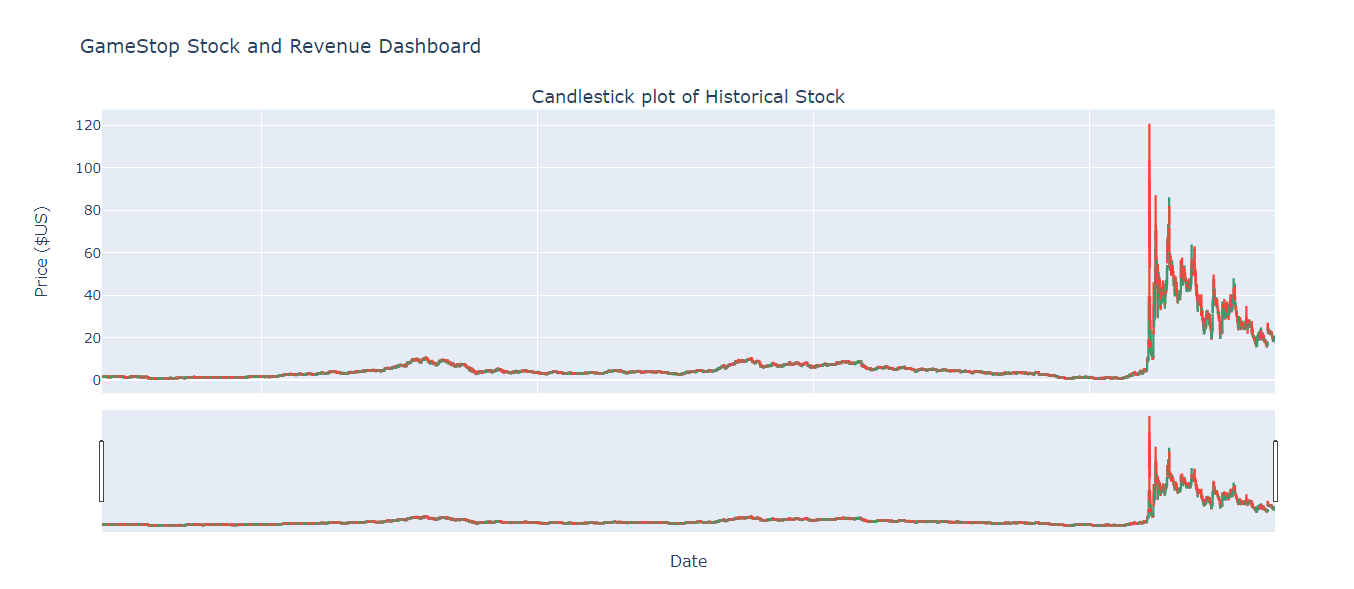

#### Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

In [2]:
make_graph(gme_data, gme_revenue,"GameStop Stock and Revenue Dashboard", ("Candlestick plot of Historical Stock", "Historical Revenue"))

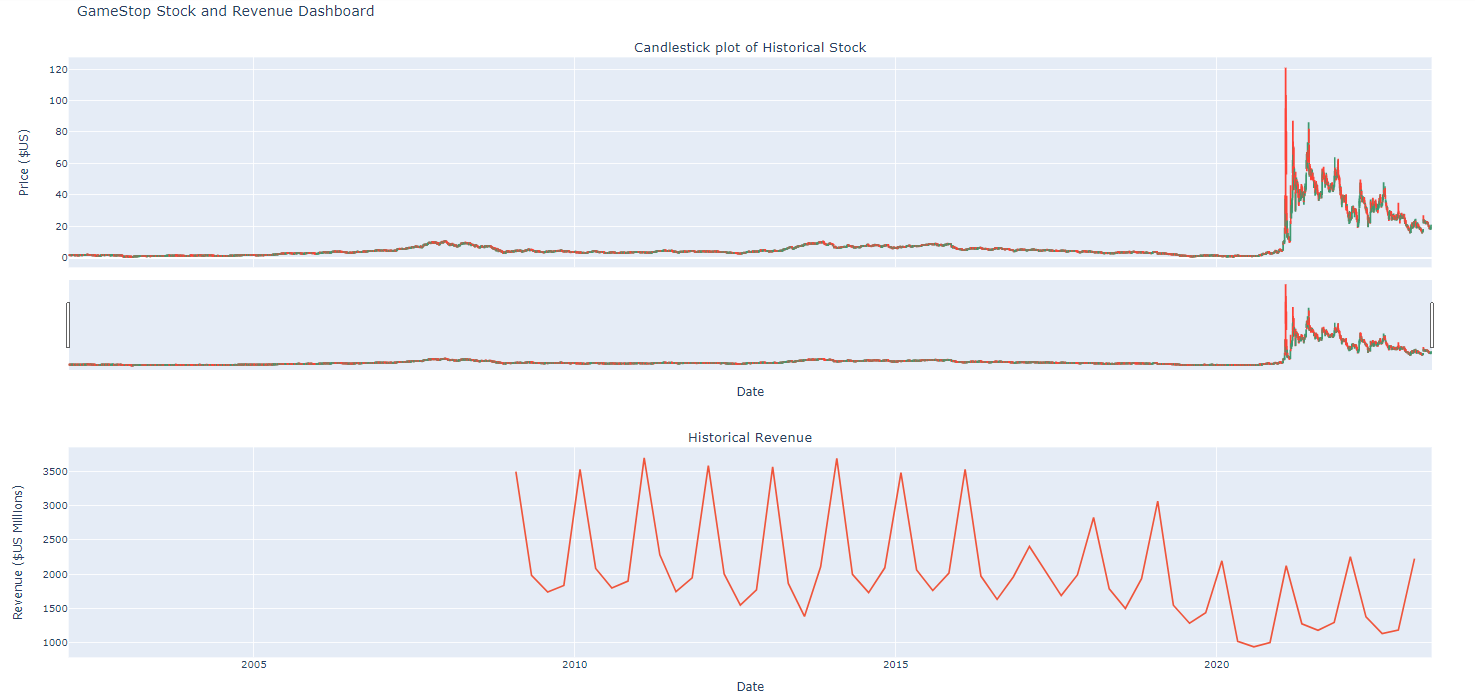